In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
# import randomized search
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from prophet import Prophet
from prophet.diagnostics import cross_validation
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ParameterSampler
import plotly.express as px
import plotly.graph_objects as go
from prophet.diagnostics import cross_validation, performance_metrics
# from common.preprocessor import load_data
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [2]:
# Load dataset
# data = load_data('./data','Commodity Prices Monthly.csv')
data = pd.read_csv('../data/Pre-processed.csv')

In [3]:
data.head()

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69


In [4]:
# data = data.reset_index()

In [5]:
data.head()

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69


In [6]:
??prophet

Object `prophet` not found.


In [7]:
data.columns = ['ds', 'y']

In [ ]:
data

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69
...,...,...
247,2022-08-01,97.74
248,2022-09-01,90.57
249,2022-10-01,93.60
250,2022-11-01,90.38


In [8]:
data[['y']]

,y
0,19.96
1,20.19
2,24.03
3,26.03
4,25.69
...,...
247,97.74
248,90.57
249,93.60
250,90.38


In [9]:
data.dtypes

ds     object
y     float64
dtype: object

In [10]:
data.describe() # display the summary statistics of the data


,y
count,252.000000
mean,69.464722
std,28.030720
min,19.960000
25%,48.472500
50%,65.475000
75%,91.955000
max,134.790000


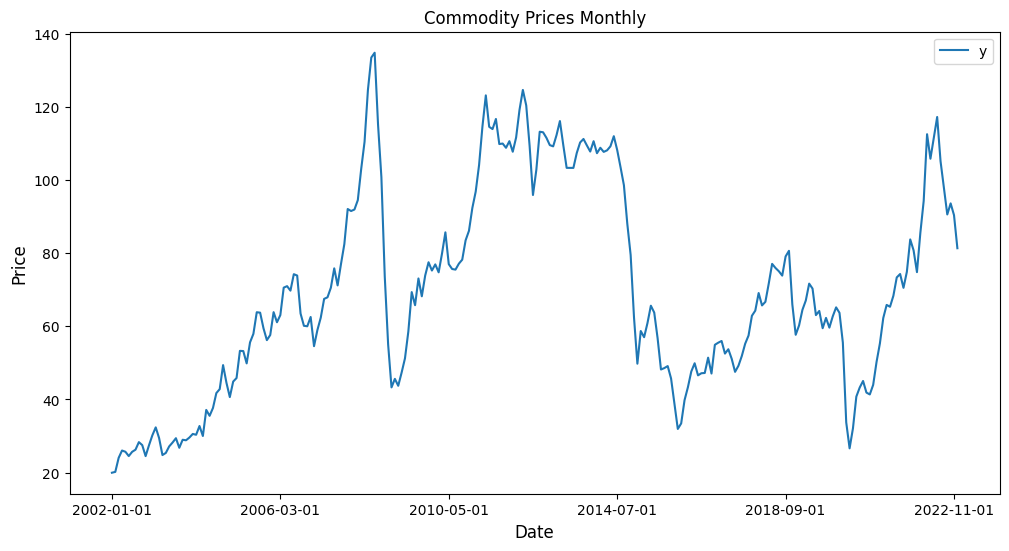

In [11]:
# plot the data
data.plot(x='ds', y= 'y', title='Commodity Prices Monthly', figsize=(12, 6))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [ ]:
# set training and testing start dates
train = data[['ds', 'y']].copy()
test = data[['ds', 'y']].copy()

In [ ]:
train = train[train['ds'] < '2019-01-01']
test = test[test['ds'] >= '2019-01-01']

train.head()

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69


In [ ]:
test.head()

,ds,y
204,2019-01-01,60.23
205,2019-02-01,64.50
206,2019-03-01,67.05
207,2019-04-01,71.66
208,2019-05-01,70.30


In [ ]:
# train = pd.read_csv('train_data.csv')
# test = pd.read_csv('test_data.csv')

In [ ]:
Prophet??

Init signature:
Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
    scaling: str = 'absmax',
    holidays_mode=None,
)
Source:        
class Prophet(object):
    """Prophet forecaster.

    Parameters
    ----------
    growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
        flat trend.
    changepoints: List of dates at which to include potential changepoints. If
        not specified, potential changepoints are selected automatically.
    n_changepoints: Number of potential changepoints to include. Not used
        if input `changepoints` is supplied. If `changepoin

In [ ]:
# from sklearn.base import BaseEstimator
# # perform hyperparameter tuning with randomized search
# # define the parameter grid
# param_grid = {
#     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
#     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
#     'seasonality_mode': ['additive', 'multiplicative'],
#     'n_changepoints': [10, 20, 30, 40, 50],
#     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
#     'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
#     'seasonality_mode': ['additive', 'multiplicative'],
#     'daily_seasonality': [True, False],
#     'weekly_seasonality': [True, False],
#     'yearly_seasonality': [True, False]
# }

# # initialize the model
# class ProphetEstimator(BaseEstimator):
#     def __init__(self, **kwargs):
#         self.model = Prophet(**kwargs)
    
#     def fit(self, X, y=None):
#         self.model.fit(X, y)
#         return self
    
#     def predict(self, X):
#         return self.model.predict(X)

#     def score(self, X, y):
#         prediction = self.predict(X)
#         return mean_absolute_error(y, predictions)
# # {'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'n_changepoints': 10, 'holidays_prior_scale': 0.1, 'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'changepoint_prior_scale': 0.1}

# # initialize the model
# model = ProphetEstimator(seasonality_prior_scale=0.1, seasonality_mode='multiplicative', n_changepoints=10, holidays_prior_scale=0.1, daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True, changepoint_prior_scale=0.1)

# # perform grid search
# grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(train)


In [12]:

# Initialize the Prophet model
model = Prophet()

In [13]:
# Fit the model with your training data
model.fit(data)

11:14:15 - cmdstanpy - INFO - Chain [1] start processing
11:14:15 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
test.shape

(48, 2)

In [15]:

# Create an empty dataframe to hold your future predictions
future = model.make_future_dataframe(periods=24, freq='MS', include_history=True)
future.shape

(276, 1)

In [16]:
# Use the model to make predictions
forecast = model.predict(future)

In [17]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2002-01-01,27.744437
1,2002-02-01,30.226146
2,2002-03-01,32.586918
3,2002-04-01,34.425992
4,2002-05-01,35.839756
...,...,...
271,2024-08-01,59.711545
272,2024-09-01,57.992602
273,2024-10-01,56.871971
274,2024-11-01,54.128261


d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


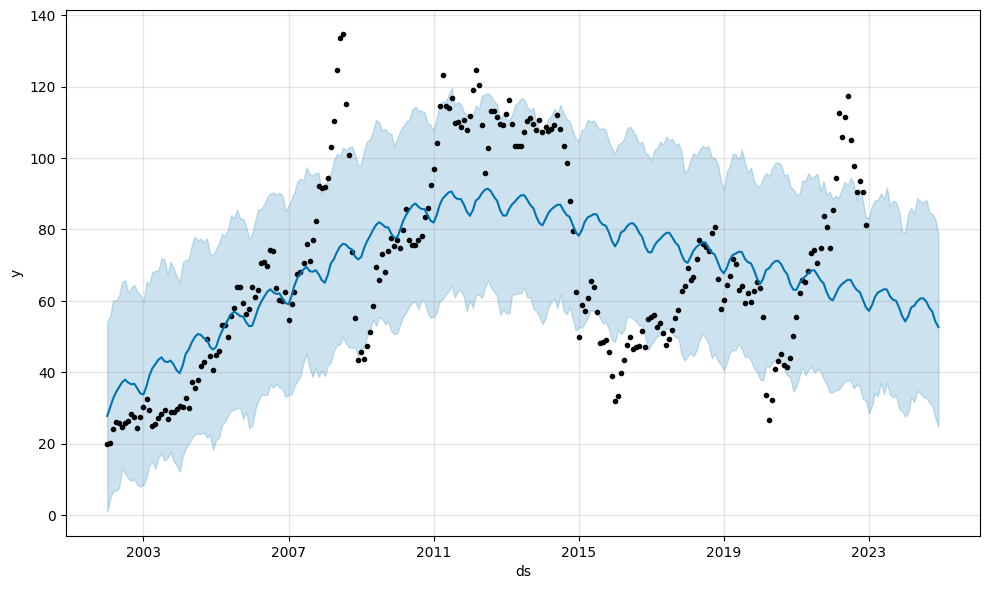

In [18]:

# Plot the original data and the forecast
model.plot(forecast)
plt.show()

In [19]:
# plot actual vs predicted
fig = go.Figure([go.Scatter(x=data['ds'], y=data['y'],mode='lines',
                    name='Actual')])
#You can add traces using an Express plot by using add_trace
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                   mode='lines+markers',
                    name='predicted'))
#To display a figure using the renderers framework, you call the .show() method on a graph object figure, or pass the figure to the plotly.io.show function. 
#With either approach, plotly.py will display the figure using the current default renderer(s).
fig.show()

d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

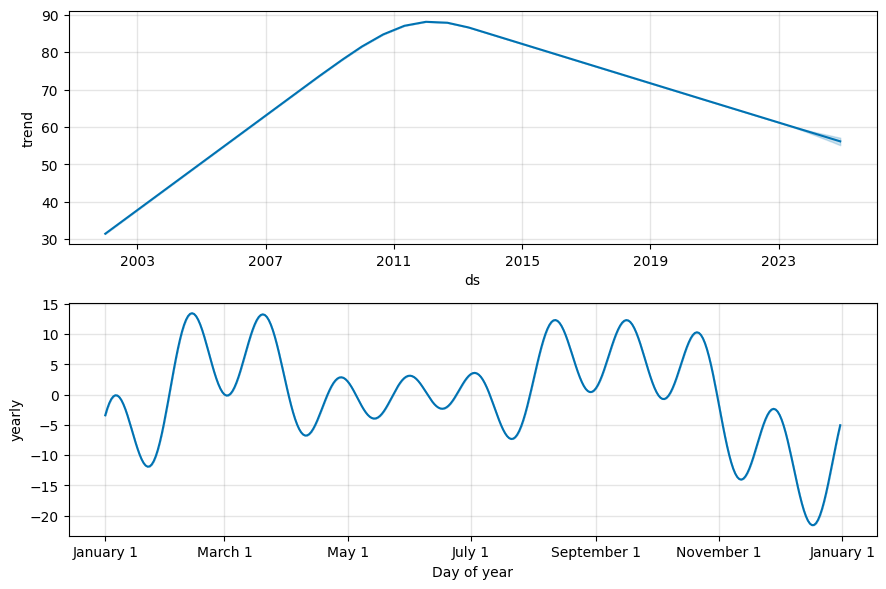

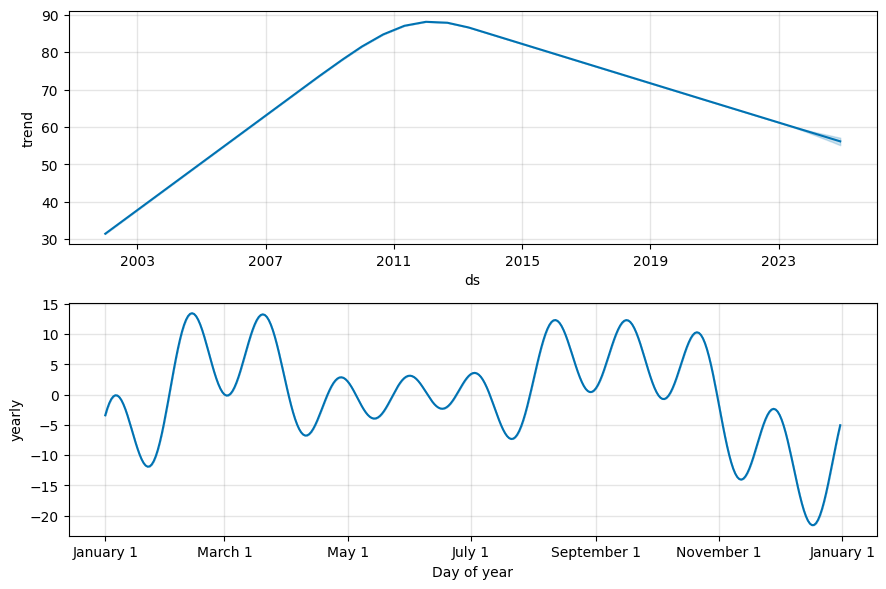

In [20]:
model.plot_components(forecast)

In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2002-01-01,20.878677
1,2002-02-01,23.010893
2,2002-03-01,25.932340
3,2002-04-01,28.816802
4,2002-05-01,29.915018
...,...,...
247,2022-08-01,25.174667
248,2022-09-01,23.411628
249,2022-10-01,21.781333
250,2022-11-01,18.734291


In [ ]:
data

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69
...,...,...
247,2022-08-01,97.74
248,2022-09-01,90.57
249,2022-10-01,93.60
250,2022-11-01,90.38


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2002-01-01,20.878677
1,2002-02-01,23.010893
2,2002-03-01,25.932340
3,2002-04-01,28.816802
4,2002-05-01,29.915018
...,...,...
247,2022-08-01,25.174667
248,2022-09-01,23.411628
249,2022-10-01,21.781333
250,2022-11-01,18.734291


In [ ]:
# evaluation with mae and mape
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(data['y'], forecast['yhat'])
print('Mean Absolute Error: %.3f' % mae)

Mean Absolute Error: 18.138


In [ ]:
mape = mean_absolute_percentage_error(data['y'], forecast['yhat'])
print('Mean Absolute Percentage Error: %.3f' % mape)

Mean Absolute Percentage Error: 0.270


### Introducing Hyper parameter tuning


In [ ]:
??Prophet

Init signature:
Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
    scaling: str = 'absmax',
    holidays_mode=None,
)
Source:        
class Prophet(object):
    """Prophet forecaster.

    Parameters
    ----------
    growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
        flat trend.
    changepoints: List of dates at which to include potential changepoints. If
        not specified, potential changepoints are selected automatically.
    n_changepoints: Number of potential changepoints to include. Not used
        if input `changepoints` is supplied. If `changepoin

In [ ]:
print(train.shape, test.shape)

(204, 2) (48, 2)


22:30:15 - cmdstanpy - INFO - Chain [1] start processing
22:30:15 - cmdstanpy - INFO - Chain [1] done processing
22:30:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:30:16 - cmdstanpy - INFO - Chain [1] start processing
22:30:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:19 - cmdstanpy - INFO - Chain [1] start processing
22:30:19 - cmdstanpy - INFO - Chain [1] done processing
22:30:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:30:19 - cmdstanpy - INFO - Chain [1] start processing
22:30:19 - cmdstanpy - INFO - Chain [1] done processing
22:30:20 - cmdstanpy - INFO - Chain [1] start processing
22:30:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:20 - cmdstanpy - INFO - Chain [1] start processing
22:30:20 - cmdstanpy - INFO - Chain [1] done processing
22:30:21 - cmdstanpy - INFO - Chain [1] start processing
22:30:21 - cmdstanpy - INFO - Chain [1] done processing
22:30:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:30:21 - cmdstanpy - INFO - Chain [1] start processing
22:30:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:22 - cmdstanpy - INFO - Chain [1] start processing
22:30:22 - cmdstanpy - INFO - Chain [1] done processing
22:30:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:30:22 - cmdstanpy - INFO - Chain [1] start processing
22:30:24 - cmdstanpy - INFO - Chain [1] done processing
22:30:24 - cmdstanpy - INFO - Chain [1] start processing
22:30:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:24 - cmdstanpy - INFO - Chain [1] start processing
22:30:24 - cmdstanpy - INFO - Chain [1] done processing
22:30:25 - cmdstanpy - INFO - Chain [1] start processing
22:30:25 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:25 - cmdstanpy - INFO - Chain [1] start processing
22:30:25 - cmdstanpy - INFO - Chain [1] done processing
22:30:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:30:25 - cmdstanpy - INFO - Chain [1] start processing
22:30:26 - cmdstanpy - INFO - Chain [1] done processing
22:30:26 - cmdstanpy - INFO - Chain [1] start processing
22:30:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:26 - cmdstanpy - INFO - Chain [1] start processing
22:30:26 - cmdstanpy - INFO - Chain [1] done processing
22:30:27 - cmdstanpy - INFO - Chain [1] start processing
22:30:27 - cmdstanpy - INFO - Chain [1] done processing
22:30:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:30:27 - cmdstanpy - INFO - Chain [1] start processing
22:30:28 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:28 - cmdstanpy - INFO - Chain [1] start processing
22:30:28 - cmdstanpy - INFO - Chain [1] done processing
22:30:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:30:28 - cmdstanpy - INFO - Chain [1] start processing
22:30:29 - cmdstanpy - INFO - Chain [1] done processing
22:30:30 - cmdstanpy - INFO - Chain [1] start processing
22:30:30 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:30 - cmdstanpy - INFO - Chain [1] start processing
22:30:30 - cmdstanpy - INFO - Chain [1] done processing
22:30:30 - cmdstanpy - INFO - Chain [1] start processing
22:30:30 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:31 - cmdstanpy - INFO - Chain [1] start processing
22:30:31 - cmdstanpy - INFO - Chain [1] done processing
22:30:31 - cmdstanpy - INFO - Chain [1] start processing
22:30:31 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:31 - cmdstanpy - INFO - Chain [1] start processing
22:30:31 - cmdstanpy - INFO - Chain [1] done processing
22:30:32 - cmdstanpy - INFO - Chain [1] start processing
22:30:32 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:32 - cmdstanpy - INFO - Chain [1] start processing
22:30:32 - cmdstanpy - INFO - Chain [1] done processing
22:30:33 - cmdstanpy - INFO - Chain [1] start processing
22:30:33 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:33 - cmdstanpy - INFO - Chain [1] start processing
22:30:33 - cmdstanpy - INFO - Chain [1] done processing
22:30:33 - cmdstanpy - INFO - Chain [1] start processing
22:30:33 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:34 - cmdstanpy - INFO - Chain [1] start processing
22:30:34 - cmdstanpy - INFO - Chain [1] done processing
22:30:34 - cmdstanpy - INFO - Chain [1] start processing
22:30:34 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:34 - cmdstanpy - INFO - Chain [1] start processing
22:30:34 - cmdstanpy - INFO - Chain [1] done processing
22:30:35 - cmdstanpy - INFO - Chain [1] start processing
22:30:35 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:35 - cmdstanpy - INFO - Chain [1] start processing
22:30:35 - cmdstanpy - INFO - Chain [1] done processing
22:30:36 - cmdstanpy - INFO - Chain [1] start processing
22:30:36 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:36 - cmdstanpy - INFO - Chain [1] start processing
22:30:36 - cmdstanpy - INFO - Chain [1] done processing
22:30:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:30:36 - cmdstanpy - INFO - Chain [1] start processing
22:30:36 - cmdstanpy - INFO - Chain [1] done processing
22:30:37 - cmdstanpy - INFO - Chain [1] start processing
22:30:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:37 - cmdstanpy - INFO - Chain [1] start processing
22:30:37 - cmdstanpy - INFO - Chain [1] done processing
22:30:37 - cmdstanpy - INFO - Chain [1] start processing
22:30:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:38 - cmdstanpy - INFO - Chain [1] start processing
22:30:38 - cmdstanpy - INFO - Chain [1] done processing
22:30:38 - cmdstanpy - INFO - Chain [1] start processing
22:30:38 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:38 - cmdstanpy - INFO - Chain [1] start processing
22:30:38 - cmdstanpy - INFO - Chain [1] done processing
22:30:39 - cmdstanpy - INFO - Chain [1] start processing
22:30:39 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:39 - cmdstanpy - INFO - Chain [1] start processing
22:30:39 - cmdstanpy - INFO - Chain [1] done processing
22:30:40 - cmdstanpy - INFO - Chain [1] start processing
22:30:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:40 - cmdstanpy - INFO - Chain [1] start processing
22:30:40 - cmdstanpy - INFO - Chain [1] done processing
22:30:41 - cmdstanpy - INFO - Chain [1] start processing
22:30:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:41 - cmdstanpy - INFO - Chain [1] start processing
22:30:41 - cmdstanpy - INFO - Chain [1] done processing
22:30:41 - cmdstanpy - INFO - Chain [1] start processing
22:30:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:42 - cmdstanpy - INFO - Chain [1] start processing
22:30:42 - cmdstanpy - INFO - Chain [1] done processing
22:30:42 - cmdstanpy - INFO - Chain [1] start processing
22:30:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:43 - cmdstanpy - INFO - Chain [1] start processing
22:30:43 - cmdstanpy - INFO - Chain [1] done processing
22:30:43 - cmdstanpy - INFO - Chain [1] start processing
22:30:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:43 - cmdstanpy - INFO - Chain [1] start processing
22:30:43 - cmdstanpy - INFO - Chain [1] done processing
22:30:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:30:43 - cmdstanpy - INFO - Chain [1] start processing
22:30:44 - cmdstanpy - INFO - Chain [1] done processing
22:30:44 - cmdstanpy - INFO - Chain [1] start processing
22:30:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:44 - cmdstanpy - INFO - Chain [1] start processing
22:30:45 - cmdstanpy - INFO - Chain [1] done processing
22:30:45 - cmdstanpy - INFO - Chain [1] start processing
22:30:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:45 - cmdstanpy - INFO - Chain [1] start processing
22:30:45 - cmdstanpy - INFO - Chain [1] done processing
22:30:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:30:45 - cmdstanpy - INFO - Chain [1] start processing
22:30:45 - cmdstanpy - INFO - Chain [1] done processing
22:30:46 - cmdstanpy - INFO - Chain [1] start processing
22:30:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:46 - cmdstanpy - INFO - Chain [1] start processing
22:30:46 - cmdstanpy - INFO - Chain [1] done processing
22:30:47 - cmdstanpy - INFO - Chain [1] start processing
22:30:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:47 - cmdstanpy - INFO - Chain [1] start processing
22:30:47 - cmdstanpy - INFO - Chain [1] done processing
22:30:47 - cmdstanpy - INFO - Chain [1] start processing
22:30:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:48 - cmdstanpy - INFO - Chain [1] start processing
22:30:48 - cmdstanpy - INFO - Chain [1] done processing
22:30:48 - cmdstanpy - INFO - Chain [1] start processing
22:30:48 - cmdstanpy - INFO - Chain [1] done processing
22:30:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:30:48 - cmdstanpy - INFO - Chain [1] start processing
22:30:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:49 - cmdstanpy - INFO - Chain [1] start processing
22:30:49 - cmdstanpy - INFO - Chain [1] done processing
22:30:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:30:49 - cmdstanpy - INFO - Chain [1] start processing
22:30:54 - cmdstanpy - INFO - Chain [1] done processing
22:30:54 - cmdstanpy - INFO - Chain [1] start processing
22:30:54 - cmdstanpy - INFO - Chain [1] done processing
22:30:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:30:54 - cmdstanpy - INFO - Chain [1] start processing
22:30:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:30:55 - cmdstanpy - INFO - Chain [1] start processing
22:30:55 - cmdstanpy - INFO - Chain [1] done processing
22:30:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:30:55 - cmdstanpy - INFO - Chain [1] start processing
22:30:59 - cmdstanpy - INFO - Chain [1] done processing
22:30:59 - cmdstanpy - INFO - Chain [1] start processing
22:30:59 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:00 - cmdstanpy - INFO - Chain [1] start processing
22:31:00 - cmdstanpy - INFO - Chain [1] done processing
22:31:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:31:00 - cmdstanpy - INFO - Chain [1] start processing
22:31:00 - cmdstanpy - INFO - Chain [1] done processing
22:31:00 - cmdstanpy - INFO - Chain [1] start processing
22:31:01 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:01 - cmdstanpy - INFO - Chain [1] start processing
22:31:01 - cmdstanpy - INFO - Chain [1] done processing
22:31:01 - cmdstanpy - INFO - Chain [1] start processing
22:31:01 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:02 - cmdstanpy - INFO - Chain [1] start processing
22:31:02 - cmdstanpy - INFO - Chain [1] done processing
22:31:02 - cmdstanpy - INFO - Chain [1] start processing
22:31:02 - cmdstanpy - INFO - Chain [1] done processing
22:31:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:31:02 - cmdstanpy - INFO - Chain [1] start processing
22:31:03 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:03 - cmdstanpy - INFO - Chain [1] start processing
22:31:03 - cmdstanpy - INFO - Chain [1] done processing
22:31:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:31:03 - cmdstanpy - INFO - Chain [1] start processing
22:31:03 - cmdstanpy - INFO - Chain [1] done processing
22:31:04 - cmdstanpy - INFO - Chain [1] start processing
22:31:04 - cmdstanpy - INFO - Chain [1] done processing
22:31:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:31:04 - cmdstanpy - INFO - Chain [1] start processing
22:31:04 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:05 - cmdstanpy - INFO - Chain [1] start processing
22:31:05 - cmdstanpy - INFO - Chain [1] done processing
22:31:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:31:05 - cmdstanpy - INFO - Chain [1] start processing
22:31:09 - cmdstanpy - INFO - Chain [1] done processing
22:31:09 - cmdstanpy - INFO - Chain [1] start processing
22:31:09 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:09 - cmdstanpy - INFO - Chain [1] start processing
22:31:10 - cmdstanpy - INFO - Chain [1] done processing
22:31:10 - cmdstanpy - INFO - Chain [1] start processing
22:31:10 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:10 - cmdstanpy - INFO - Chain [1] start processing
22:31:10 - cmdstanpy - INFO - Chain [1] done processing
22:31:11 - cmdstanpy - INFO - Chain [1] start processing
22:31:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:11 - cmdstanpy - INFO - Chain [1] start processing
22:31:11 - cmdstanpy - INFO - Chain [1] done processing
22:31:11 - cmdstanpy - INFO - Chain [1] start processing
22:31:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:12 - cmdstanpy - INFO - Chain [1] start processing
22:31:12 - cmdstanpy - INFO - Chain [1] done processing
22:31:12 - cmdstanpy - INFO - Chain [1] start processing
22:31:12 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:12 - cmdstanpy - INFO - Chain [1] start processing
22:31:13 - cmdstanpy - INFO - Chain [1] done processing
22:31:13 - cmdstanpy - INFO - Chain [1] start processing
22:31:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:13 - cmdstanpy - INFO - Chain [1] start processing
22:31:13 - cmdstanpy - INFO - Chain [1] done processing
22:31:14 - cmdstanpy - INFO - Chain [1] start processing
22:31:14 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:14 - cmdstanpy - INFO - Chain [1] start processing
22:31:14 - cmdstanpy - INFO - Chain [1] done processing
22:31:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:31:14 - cmdstanpy - INFO - Chain [1] start processing
22:31:15 - cmdstanpy - INFO - Chain [1] done processing
22:31:15 - cmdstanpy - INFO - Chain [1] start processing
22:31:16 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:16 - cmdstanpy - INFO - Chain [1] start processing
22:31:16 - cmdstanpy - INFO - Chain [1] done processing
22:31:16 - cmdstanpy - INFO - Chain [1] start processing
22:31:16 - cmdstanpy - INFO - Chain [1] done processing
22:31:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:31:16 - cmdstanpy - INFO - Chain [1] start processing
22:31:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:18 - cmdstanpy - INFO - Chain [1] start processing
22:31:18 - cmdstanpy - INFO - Chain [1] done processing
22:31:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:31:18 - cmdstanpy - INFO - Chain [1] start processing
22:31:30 - cmdstanpy - INFO - Chain [1] done processing
22:31:30 - cmdstanpy - INFO - Chain [1] start processing
22:31:30 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:30 - cmdstanpy - INFO - Chain [1] start processing
22:31:30 - cmdstanpy - INFO - Chain [1] done processing
22:31:31 - cmdstanpy - INFO - Chain [1] start processing
22:31:31 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:31 - cmdstanpy - INFO - Chain [1] start processing
22:31:31 - cmdstanpy - INFO - Chain [1] done processing
22:31:31 - cmdstanpy - INFO - Chain [1] start processing
22:31:31 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:32 - cmdstanpy - INFO - Chain [1] start processing
22:31:32 - cmdstanpy - INFO - Chain [1] done processing
22:31:32 - cmdstanpy - INFO - Chain [1] start processing
22:31:32 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

22:31:32 - cmdstanpy - INFO - Chain [1] start processing
22:31:33 - cmdstanpy - INFO - Chain [1] done processing


Best parameters: {'yearly_seasonality': True, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'n_changepoints': 20, 'holidays_prior_scale': 0.01, 'changepoint_prior_scale': 0.5}


22:31:33 - cmdstanpy - INFO - Chain [1] start processing
22:31:33 - cmdstanpy - INFO - Chain [1] done processing


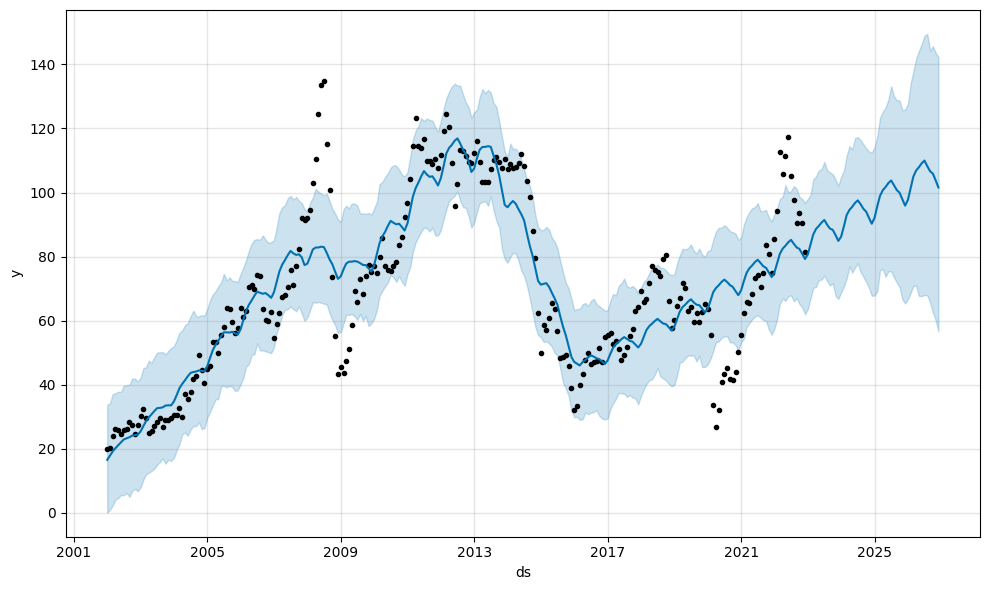

In [ ]:
df = data.copy()

# Define the parameter grid for the randomized search

param_grid = {  
    # 'growth': ['linear','logistic','flat'],
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'n_changepoints': [10, 20, 30, 40, 50],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'yearly_seasonality': [True, False],
}

# Placeholder for best parameters and lowest error
best_params = None
lowest_error = float('inf')

# Define the number of iterations for the randomized search
n_iter = 50

# Perform randomized search
for params in ParameterSampler(param_grid, n_iter):
    m = Prophet(**params)
    if params['yearly_seasonality']:
        m.add_seasonality(name='yearly', period=365.25, fourier_order=10)  # Add fourier_order here
    m.fit(df)
    df_cv = cross_validation(m, initial='5844 D', period='1461 D', horizon = '1461 D')
    error = mean_absolute_error(df_cv['y'], df_cv['yhat'])
    
    if error < lowest_error:
        best_params = params
        lowest_error = error

# Print the best parameters
print(f"Best parameters: {best_params}")

# Fit and predict with the best parameters
m = Prophet(**best_params)
if best_params['yearly_seasonality']:
    m.add_seasonality(name='yearly', period=365.25, fourier_order=10)  # Add fourier_order here
m.fit(df)
future = m.make_future_dataframe(periods=48, freq='MS')
forecast = m.predict(future)

# Plot the forecast
fig = m.plot(forecast)

In [ ]:
error

17.295810151306657

In [ ]:
error = mean_absolute_percentage_error(df_cv['y'], df_cv['yhat'])
print('Mean Absolute Percentage Error: %.3f' % error)

Mean Absolute Percentage Error: 0.343
